In [ ]:
# Genetic Algorithms

In [80]:
# Generating a bit pattern with predefined parameters

import random
import array

from deap import base
from deap import creator
from deap import tools
from deap import gp

# Evaluation func
def eval_func(individual):
    target_sum = 45
    #print(len(individual) - abs(sum(individual) - target_sum))
    #print(len(individual) - abs(sum(individual) - target_sum),) # The difference when you don't add this comma is the return valus are intigers or tuppels. 
    # The return values must betupels or objects becasue the line 'ind.fitness.values = fit' gives error because 'ind' is an integer and it not an object 
    # Don't forget the comma
    return len(individual) - abs(sum(individual) - target_sum),


# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights = (1.0,))
    creator.create("Individual", list, fitness = creator.FitnessMax)
    
    # toolbox is an object that is commonly used in DEAP
    # Initialize the toolbox
    toolbox = base.Toolbox()
    
    # Generate attributes; i.e., random integers of 0 and 1, which is the 'bit string'
    toolbox.register("attr_bool", random.randint, 0, 1)
    
    # Initialize structures; Register the individual function; 
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, num_bits)
    
    # Register the population function as a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    
    # Register the genetic operator; which is a evaluation func ans act as a fitness func
    # We want an individual with 45 ones
    toolbox.register("evaluate", eval_func)
    
    # Register the crossover operator named as 'mate' using the cxTwoPoint method
    toolbox.register("mate", tools.cxTwoPoint)
    
    # Register the mutation operator named as 'mutate'using mutFlipBit; indpb is the probability of each attribute
    toolbox.register("mutate", tools.mutFlipBit, indpb = 0.05)
    
    # Register the selection operator using selTournament; It specifies which individuals is selected for breeding
    toolbox.register("select", tools.selTournament, tournsize = 3)
    return toolbox
    
if __name__ == '__main__':
    # Define the numbe of bits
    num_bits = 75
    
    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)
    
    # Seed the random number generator so that we can get repeatable results
    random.seed(7)
    
    # Create an initial population of 500 individuals
    population = toolbox.population(n=100)
    print(population[0])
    print(sum(population[0]))
    
    # Define probabilities of crossing and mutating
    probab_crossing, propbab_mutating = 0.5, 0.2
    
    # Define the numnber of iterations that you ned to iterate before terminating; The more the number of itterations, the more freedom to improve the population
    num_generations = 60
    
    # Evaluate all individuals in the population using the fitness func
    print('\nStarting the elvaluation process')
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    print(fitnesses) 
    print(population[0].fitness.values)
   
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
        
        
    # Start itterating through generations:
    print('\nEvaluated', len(population), 'individuals')
    
    for g in range(num_generations):
        print("\n=====Generation", g)
        
        # Select the next generation individulas
        offspring = toolbox.select(population, len(population))
        
        # Clone the selected indivulas
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply corssover and mutation on the offspring
        for child1, child2, in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if random.random() < probab_crossing:
                toolbox.mate(child1, child2)
                
                # "Forget" the fitness of the the children
                del child1.fitness.values
                del child2.fitness.values
                
            # Apply mutation to the next generation individuals using corresponding probability value defined earlier. Once it is done, reset the fitness value
            for mutant in offspring:
                # Mute an individual
                if random.random() < probab_mutating:
                    toolbox.mutate(mutant)
                    del mutant.fitness.values

            # Evaluate individual with an invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitnesses = map(toolbox.evaluate, invalid_ind)
            for ind, fit in zip(invalid_ind, fitnesses):
                ind.fitness.values = fit
                
            print('Evaluated', len(invalid_ind), 'individuals')
                
            # The population is entirely replaced by offspring
            population[:] = offspring

            # Print the stats for the current generation
            fits = [ind.fitness.values[0] for ind in population]

            length = len(population)
            mean = sum(fits)/length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print('Min = ', min(fits), 'Max = ', max(fits))
            print('Average =', round(mean,2), 'STD = ', round(std,2))
                
        print("\n==== End of evolution")

        # print final output
        best_ind = tools.selBest(population, 1)[0]
        print('\nBest individual:\n', best_ind)
        print('\nNumber of ones:', sum(best_ind))
                
                
                    
                
                
    
    
    

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
34

Starting the elvaluation process
[(64,), (66,), (71,), (60,), (66,), (66,), (65,), (72,), (74,), (63,), (69,), (66,), (67,), (65,), (69,), (58,), (58,), (71,), (66,), (74,), (69,), (65,), (72,), (67,), (64,), (66,), (62,), (68,), (75,), (68,), (67,), (66,), (64,), (68,), (67,), (61,), (69,), (66,), (67,), (65,), (69,), (73,), (70,), (67,), (65,), (55,), (67,), (75,), (74,), (66,), (67,), (61,), (57,), (63,), (65,), (66,), (65,), (72,), (60,), (67,), (63,), (73,), (59,), (71,), (63,), (72,), (68,), (67,), (63,), (60,), (73,), (68,), (72,), (62,), (70,), (62,), (67,), (67,), (75,), (68,), (68,), (66,), (67,), (75,), (71,), (73,), (67,), (67,), (65,), (69,), (68,), (68,), (68,), (71,), (65,), (66,), (66,), (64,), (65,), (75,)]
()

Evaluated 100 individuals

=====

In [75]:
# Generating a bit pattern with predefined parameters

import random

from deap import base, creator, tools

# Evaluation function
def eval_func(individual):
    target_sum = 45
    return len(individual) - abs(sum(individual) - target_sum),

# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Initialize the toolbox
    toolbox = base.Toolbox()

    # Generate attributes 
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Initialize structures
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
        toolbox.attr_bool, num_bits)

    # Define the population to be a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register the evaluation operator 
    toolbox.register("evaluate", eval_func)

    # Register the crossover operator
    toolbox.register("mate", tools.cxTwoPoint)

    # Register a mutation operator
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

    # Operator for selecting individuals for breeding
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

if __name__ == "__main__":
    # Define the number of bits
    num_bits = 60

    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)

    # Seed the random number generator
    random.seed(7)

    # Create an initial population of 500 individuals
    population = toolbox.population(n=100)

    # Define probabilities of crossing and mutating
    probab_crossing, probab_mutating  = 0.5, 0.2

    # Define the number of generations
    num_generations = 60
    
    print('\nStarting the evolution process')
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    
    print('\nEvaluated', len(population), 'individuals')
    
    # Iterate through generations
    for g in range(num_generations):
        print("\n===== Generation", g)
        
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if random.random() < probab_crossing:
                toolbox.mate(child1, child2)

                # "Forget" the fitness values of the children
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            # Mutate an individual
            if random.random() < probab_mutating:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        print('Evaluated', len(invalid_ind), 'individuals')
        
        # The population is entirely replaced by the offspring
        population[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in population]
        
        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print('Min =', min(fits), ', Max =', max(fits))
        print('Average =', round(mean, 2), ', Standard deviation =', 
                round(std, 2))
    
    print("\n==== End of evolution")
    
    best_ind = tools.selBest(population, 1)[0]
    print('\nBest individual:\n', best_ind)
    print('\nNumber of ones:', sum(best_ind))


Starting the evolution process

Evaluated 100 individuals

===== Generation 0
Evaluated 64 individuals
Min = 40.0 , Max = 55.0
Average = 47.55 , Standard deviation = 2.94

===== Generation 1
Evaluated 62 individuals
Min = 41.0 , Max = 56.0
Average = 49.57 , Standard deviation = 2.58

===== Generation 2
Evaluated 52 individuals
Min = 46.0 , Max = 56.0
Average = 51.49 , Standard deviation = 2.04

===== Generation 3
Evaluated 49 individuals
Min = 49.0 , Max = 57.0
Average = 52.89 , Standard deviation = 1.76

===== Generation 4
Evaluated 71 individuals
Min = 49.0 , Max = 60.0
Average = 54.18 , Standard deviation = 1.86

===== Generation 5
Evaluated 66 individuals
Min = 52.0 , Max = 60.0
Average = 55.52 , Standard deviation = 1.8

===== Generation 6
Evaluated 59 individuals
Min = 52.0 , Max = 60.0
Average = 56.74 , Standard deviation = 1.73

===== Generation 7
Evaluated 53 individuals
Min = 50.0 , Max = 60.0
Average = 58.05 , Standard deviation = 1.84

===== Generation 8
Evaluated 61 indiv

gen	evals	std   	min    	avg    	max    
0  	200  	188.36	217.082	576.281	1199.71
1  	200  	250.543	196.583	659.389	1869.02
2  	200  	273.081	199.455	683.641	1770.65
3  	200  	215.326	111.298	503.933	1579.3 
4  	200  	133.046	149.47 	373.124	790.899
5  	200  	75.4405	131.117	274.092	585.433
6  	200  	61.2622	91.7121	232.624	426.666
7  	200  	49.8303	88.8185	201.117	373.543
8  	200  	39.9533	85.0531	178.645	326.209
9  	200  	31.3781	87.4824	159.211	261.132
10 	200  	31.3488	54.0743	144.561	274.877
11 	200  	30.8796	63.6032	136.791	240.739
12 	200  	24.1975	70.4913	125.691	190.684
13 	200  	21.2274	50.6409	122.293	177.483
14 	200  	25.4931	67.9873	124.132	199.296
15 	200  	26.9804	46.3411	119.295	205.331
16 	200  	24.8993	56.0033	115.614	176.702
17 	200  	21.9789	61.4999	113.417	170.156
18 	200  	21.2823	50.2455	112.419	190.677
19 	200  	22.5016	48.153 	111.543	166.2  
20 	200  	21.1602	32.1864	106.044	171.899
21 	200  	23.3864	52.8601	107.301	163.617
22 	200  	23.1008	51.1226	109.628	18

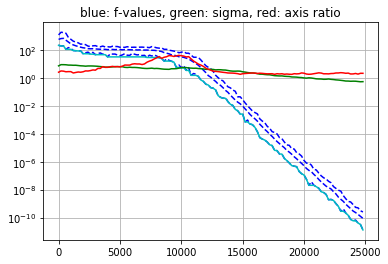

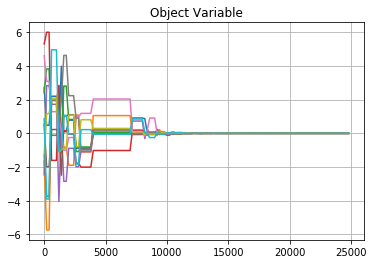

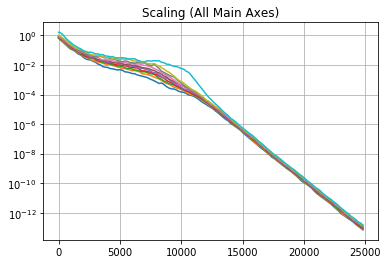

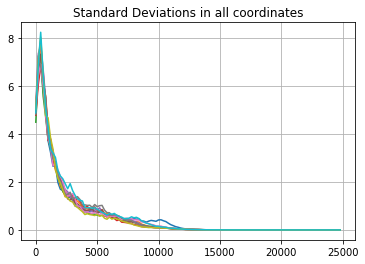

In [7]:
# Visualizin the evolution
# 'Covarience matrix adaptation evolution strategy' (CMA-ES) is a DEAP method to solve nonlinear problems in continious domain

import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, cma, creator, tools

# Define a func to cearte the toolbox using FitnessMin (using negative weights)
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights = (-1,))
    creator.create("Individual", list, fitness = creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin)
    
    # Seed the random nember generator
    np.random.seed(7)
    
    # Register generate and update methods. we generate a population from a strategy and this strategy is updated
    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)
    
    return toolbox

if __name__ == "__main__":
    
    # problem size
    num_individuals = 10
    num_generations = 125
    
    # Create aa strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid = [5.0]*num_individuals, sigma=5.0, lambda_=20*num_individuals)
    
    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)
    
    # Create hall of fame object; this object contains the best individuals exist in the population
    hall_of_fame = tools.HallOfFame(1)
    
    # Register the relevent stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    # define a logbook to keep the track of the evolution records. 
    # logbook is a chronological list of dictionaries
    logbook = tools.Logbook()
    logbook.header = "gen", "evals","std", "min", "avg", "max"
    
    # Define objects to compile all data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations,1))
    diagD = np.ndarray((num_generations,num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations,num_individuals))
    std = np.ndarray((num_generations, num_individuals))
    
    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()
        
        # Evaluate individulas using a fitness function
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
            
        # update the strategy based on population with the evaluated individuals
        toolbox.update(population)
        
        #Update the hall of fame and the statistics with the currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals = len(population), gen=gen, **record)
        print(logbook.stream)
        
        # save more data along the evolution for plotting 
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)
        
    # Define the x axis and plot the stats
    x = list(range(0, strategy.lambda_ * num_generations, strategy.lambda_))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg,"--b")
    plt.semilogy(x, max_, "--b")
    plt.semilogy(x, min_, "--b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")


    # Plot the progress
    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variable")

    plt.figure()
    plt.semilogy(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.plot(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in all coordinates")
    plt.show()






In [27]:
# Solving the single regression problem

import operator
import math
import random
import numpy as np
from deap import algorithms, base, creator, tools, gp


# define new function
def division_operator(numerator, denumerator):
    if denumerator == 0:
        return 1
    
    return numerator/denumerator

# Define the evolution func that is used for fitness calculation
def eval_func(individual, points):
    # Transform the tree expression in a callable func
    func = toolbox.compile(expr = individual)
    
    # Evaluate the mean squar error
    mse = ((func(x) - (2*x**3 - 3*x**2 + 4*x -1))**2 for x in points)
    return math.fsum(mse) / len(points),



# Define a func to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add,2)
    pset.addPrimitive(operator.sub,2)
    pset.addPrimitive(operator.mul,2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)
    
    # 'ephemeral constant' is a terminal type that does not have a fixed value. 
    # Appending an ephemeal constant to a tree --> functions get executed --> The result is inserted into the tree as a constant terminal.
    # values of ephemeral constants = -1, 0, 1
    
    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
    
    pset.renameArguments(ARG0 = 'x')
    
    # Create fitness and individual objects
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness = creator.FitnessMin)
    
    
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset= pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points = [x/10. for x in range(-10,10)])
    toolbox.register("select", tools.selTournament, tournsize = 3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_ = 0, max_ = 2)
    toolbox.register("mutate", gp.mutUniform, expr = toolbox.expr_mut, pset=pset)
    toolbox.decorate("mate", gp.staticLimit(key = operator.attrgetter("height"), max_value = 17))
    toolbox.decorate("mutate", gp.staticLimit(key = operator.attrgetter("height"), max_value = 17))
    return toolbox


if __name__ == "__main__":
    random.seed(7)
    toolbox = create_toolbox()
          
    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)
    
    # Define stat object
    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)
    
    # Register stats using the defined objects
    mstats = tools.MultiStatistics(fitness = stats_fit, size = stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)
    
    # Define crossover probability, muptation probability, and numebr of generations
    probab_crossover = 0.4
    probab_mutate = 0.2
    num_generations = 60
    
    population, log = algorithms.eaSimple(population, toolbox, probab_crossover, pobab_mutate, num_generations, stats = mstats, halloffame = hall_of_fame, verbose=True)
    

        

Exception: Ephemerals with different functions should be named differently, even between psets.

In [29]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator 

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(x) - (2 * x**3 - 3 * x**2 + 4 * x - 1))**2 for x in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10,10)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.2
    num_generations = 60

    population, log = algorithms.eaSimple(population, toolbox, 
            probab_crossover, probab_mutate, num_generations, 
            stats=mstats, halloffame=hall_of_fame, verbose=True)

Exception: Ephemerals with different functions should be named differently, even between psets.

In [41]:
# building an intelligent robot controler
# This program is a varient of the artificial ant program given in the deap library

import copy 
import random
from functools import partial

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Creat the class to control the robot
class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        max_moves = 0
        self.consumes = 0
        self.routine = None
        
        # Define directions and movements
        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1,0,-1,0]
        self.direction_col = [0,1,0,-1]
        
    # Define the reset functionality
    def _rest(self):
        self.row = self.row_start
        self.col = self.col_start
        self.direction = 1
        self.moves = 0
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        
    # Define conditional operator
    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()
        
    # Define the left turning operator
    def turn_left(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4
     # Define the left turning operator
    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction + 1) % 4
            
    # Control the robot in forward motion
    def move_forward(self):
        if self.moves < slef.max_moves:
            self.moves += 1
            slef.row = (self.row+ self.direction_row[self.direction]) % self.matrix_row
            slef.col = (self.col+ self.direction_col[self.direction]) % self.matrix_col
            
            if self.matrix_exc[slef.row][self.col] == "target":
                slef.consumed +=1
            
            self.matrix_exc[self.row][self.col] = "passed"
            
            
    # Define a method to sense the target
    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col
        return self.matrix_exc[ahead_row][ahead_col] == "target"
    
    # If you see target ahead, create the relevant function and return it
    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)
    
    # Define a method to run it
    def run(self, rutine):
        self._rest()
        while self.moves < slef.max_moves:
            rutine()
            
    # Define a function to traverse the input map
    # The '#' is target, 'S' is starting  point, '.' is empty
    def traverse_map(self,matrix):
        self.matrix = list()
        for i, line  in inumerate(matrix):
            self.matrix.append(list())
            
            for j,col in inumerate(line):
                if col == "#":
                    self.matrix[-1].append("target")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.row_start = self.row = j
                    self.direction = 1
                    
        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)
        
    
# Define a class to generate functions depending on the number of input arguments
class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2):
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):
        return partial(self._progn, out1, out2, out3)


    def eval_func(individual):
        global robot, pset

        # Transform the tree expression to functional python code
        routine = gp.compile(individual, pset)

        # run the current program (i.e., generated rutine)
        robot.run(rutine)
        return robot.consumed,

    def create_toolbox():
        global robot, pset

        pset = gp.PrimitiveSet("MAIN", 0)
        pset.addPrimitive(robot.if_taget_ahead,2)
        pset.addPrimitive(Prog().prog2,2)
        pset.addPrimitive(Prog().prog3,3)
        pset.addTerminal(robot.move_forward)
        pset.addTerminal(robot.turn_left)
        pset.addTerminal(robot.turn_right)

        # Create the object types using a fitness func
        creator.create("FitnessMax", base.Fitness, weights = (1.0,))
        creator.create("Individual", gp.PrimitiveTree, fitness = creator.FitnessMax)

        # Create the toolbox and register all the operators
        toolbox = base.Toolbox()

        # Attribute generator
        toolbox.register("expr_init", gp.genFull, pset = pset, min_=1, max_=2)

        # structure initializers
        toolbox.register("individuals", tools.initIterate, creator.Individual, toolbox.expr_init)
        toolbox.register("population", tools.initRepeat, list,toolbox.individual)
        toolbox.register("evaluate", eval_func)
        toolbox.register("select", tools.selTournament, tournsize=7)
        toolbox.register("mate", gp.cxOnePoint)
        toolbox.register("expr_mut", gp.genFull, min_= 0, Max_=2)
        toolbox.register("mutate", gp.mutUnifrom, expr= toolbox.expr_mut, pset=pset)
        return toolbox


if __name__ == "__main__":
    global robot
    
    # Seed the random number generator
    random.seed(7)
    
    # Define maximum numebr of moves
    max_moves = 750
    
    # Create the robot controller 
    robot = RobotController(max_moves)
    
    # Create toolbox
    toolbox = create_toolbox()
    
    # Read the map data
    with open('C:/Users/Peyman/Desktop/Python - Practices/target_map.txt', 'r') as f:
        robot.traverse_map(f)
        
    # Dfine population and hall of fame variables:
    population = toolbox.population(n=400)
    hall_of_fame = tool.HappOfFame(1)
    
    # Register the stats
    stats= tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register('min', np.min)
    stats.register("max", np.max)
    
    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.3
    mun_generations = 50
    
    # Run the alg to solve the problem
    algorithms.eaSimple(population, toolbox, probab_crossover, probab_mutate, num_generations, stats, halloffame = hall_of_fame)


Exception: Ephemerals with different functions should be named differently, even between psets.

In [ ]:
# there is problem in running the above the programs only once one the Ephemerals didn't make any error and the program was coreclty run!